In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
# Paso 1: Extracción (Extract)
# Leemos los tres CSV
df_facturas = pd.read_csv('tickets.csv')
df_inventario = pd.read_csv('items.csv')
df_usuarios = pd.read_csv('clients.csv')



In [6]:
# Mostramos las primeras filas de cada DataFrame
print("Facturas:")
print(df_facturas.head())
print("\nInventario:")
print(df_inventario.head())
print("\nUsuarios:")
print(df_usuarios.head())



Facturas:
   Numero_Factura       Fecha ID_Cliente           Cliente ID_Articulo  \
0               1  2024-01-05       C001        Juan Pérez        A001   
1               1  2024-01-05       C001        Juan Pérez        A002   
2               2  2024-01-07       C002      María García        A003   
3               2  2024-01-07       C002      María García        A004   
4               3  2024-01-10       C003  Carlos Rodríguez        A005   

           Articulo  Cantidad  Precio_Unitario   Total  
0            Laptop         1           899.99  899.99  
1             Mouse         1            24.99   24.99  
2         Impresora         1           199.99  199.99  
3  Papel A4 (resma)         2             4.99    9.98  
4           Monitor         2           149.99  299.98  

Inventario:
  ID_Articulo   Nombre_Articulo    Categoria  Precio  Stock  \
0        A001            Laptop  Electrónica  899.99     15   
1        A002             Mouse   Accesorios   24.99     50   
2

In [8]:
# Paso 2: Transformación (Transform)

# 2.1 Convertimos las fechas a tipo datetime
df_facturas['Fecha'] = pd.to_datetime(df_facturas['Fecha'])
df_inventario['Fecha_Ultima_Reposicion'] = pd.to_datetime(df_inventario['Fecha_Ultima_Reposicion'])
df_usuarios['Fecha_Registro'] = pd.to_datetime(df_usuarios['Fecha_Registro'])



In [11]:
# 2.2 Calculamos el total de ventas por cliente
ventas_por_cliente = df_facturas.groupby('ID_Cliente')['Total'].sum().reset_index()
ventas_por_cliente = ventas_por_cliente.merge(df_usuarios[['ID_Cliente', 'Nombre', 'Apellido']], on='ID_Cliente')
print("\nTotal de ventas por cliente:")
print(ventas_por_cliente)




Total de ventas por cliente:
  ID_Cliente   Total  Nombre   Apellido
0       C001  924.98    Juan      Pérez
1       C002  209.97   María     García
2       C003  349.97  Carlos  Rodríguez
3       C004   79.99     Ana   Martínez
4       C005  629.97   Pedro    Sánchez


In [13]:
# 2.3 Calculamos el producto más vendido
producto_mas_vendido = df_facturas.groupby('ID_Articulo')['Cantidad'].sum().reset_index()
producto_mas_vendido = producto_mas_vendido.merge(df_inventario[['ID_Articulo', 'Nombre_Articulo']], on='ID_Articulo')
producto_mas_vendido = producto_mas_vendido.sort_values('Cantidad', ascending=False)
print("\nProducto más vendido:")
print(producto_mas_vendido.head(5))




Producto más vendido:
  ID_Articulo  Cantidad   Nombre_Articulo
3        A004         2  Papel A4 (resma)
4        A005         2           Monitor
0        A001         1            Laptop
1        A002         1             Mouse
2        A003         1         Impresora


In [16]:
df_inventario.dtypes

,0
ID_Articulo,object
Nombre_Articulo,object
Categoria,object
Precio,float64
Stock,int64
Proveedor,object
Fecha_Ultima_Reposicion,datetime64[ns]
Stock_Actual,float64


In [19]:
df_stock_resta = df_facturas.groupby('ID_Articulo')['Cantidad'].sum().reset_index()
df_stock_resta

,ID_Articulo,Cantidad
0,A001,1
1,A002,1
2,A003,1
3,A004,2
4,A005,2
5,A006,1
6,A007,1
7,A008,1
8,A009,1
9,A010,1


In [31]:
df_join = df_inventario.merge(df_stock_resta, on='ID_Articulo')
df_join

,ID_Articulo,Nombre_Articulo,Categoria,Precio,Stock,Proveedor,Fecha_Ultima_Reposicion,Stock_Actual,Cantidad
0,A001,Laptop,Electrónica,899.99,15,TechSupplies Inc.,2024-01-01,14.0,1
1,A002,Mouse,Accesorios,24.99,50,PeripheryTech,2024-01-03,49.0,1
2,A003,Impresora,Electrónica,199.99,10,PrintMasters,2023-12-28,9.0,1
3,A004,Papel A4 (resma),Papelería,4.99,200,PaperWorks,2024-01-05,198.0,2
4,A005,Monitor,Electrónica,149.99,20,ScreenGenius,2023-12-30,18.0,2
5,A006,Teclado,Accesorios,49.99,30,KeyboardKings,2024-01-02,29.0,1
6,A007,Disco Duro Externo,Almacenamiento,79.99,25,DataKeepers,2024-01-04,24.0,1
7,A008,Smartphone,Electrónica,599.99,12,MobileTech,2023-12-29,11.0,1
8,A009,Funda para Smartphone,Accesorios,19.99,100,CaseCreators,2024-01-06,99.0,1
9,A010,Protector de Pantalla,Accesorios,9.99,150,ScreenShield,2024-01-07,149.0,1


In [28]:
df_inventario['Stock_Actual'] = df_inventario['Stock'][:10] - df_stock_resta['Cantidad']

In [29]:
df_inventario

,ID_Articulo,Nombre_Articulo,Categoria,Precio,Stock,Proveedor,Fecha_Ultima_Reposicion,Stock_Actual
0,A001,Laptop,Electrónica,899.99,15,TechSupplies Inc.,2024-01-01,14.0
1,A002,Mouse,Accesorios,24.99,50,PeripheryTech,2024-01-03,49.0
2,A003,Impresora,Electrónica,199.99,10,PrintMasters,2023-12-28,9.0
3,A004,Papel A4 (resma),Papelería,4.99,200,PaperWorks,2024-01-05,198.0
4,A005,Monitor,Electrónica,149.99,20,ScreenGenius,2023-12-30,18.0
5,A006,Teclado,Accesorios,49.99,30,KeyboardKings,2024-01-02,29.0
6,A007,Disco Duro Externo,Almacenamiento,79.99,25,DataKeepers,2024-01-04,24.0
7,A008,Smartphone,Electrónica,599.99,12,MobileTech,2023-12-29,11.0
8,A009,Funda para Smartphone,Accesorios,19.99,100,CaseCreators,2024-01-06,99.0
9,A010,Protector de Pantalla,Accesorios,9.99,150,ScreenShield,2024-01-07,149.0


In [14]:
# 2.4 Calculamos el stock actual

df_inventario['Stock_Actual'] = df_inventario['Stock'] - df_stock_resta['Cantidad']
print("\nStock actual:")
print(df_inventario[['ID_Articulo', 'Nombre_Articulo', 'Stock', 'Stock_Actual']])




Stock actual:
   ID_Articulo        Nombre_Articulo  Stock  Stock_Actual
0         A001                 Laptop     15           NaN
1         A002                  Mouse     50           NaN
2         A003              Impresora     10           NaN
3         A004       Papel A4 (resma)    200           NaN
4         A005                Monitor     20           NaN
5         A006                Teclado     30           NaN
6         A007     Disco Duro Externo     25           NaN
7         A008             Smartphone     12           NaN
8         A009  Funda para Smartphone    100           NaN
9         A010  Protector de Pantalla    150           NaN
10        A011        Tableta Gráfica      8           NaN
11        A012  Auriculares Bluetooth     40           NaN
12        A013             Cámara Web     18           NaN
13        A014           Router Wi-Fi     22           NaN
14        A015        Batería Externa     60           NaN


In [32]:
# 2.5 Analizamos las ventas por tipo de cliente
df_facturas_con_tipo = df_facturas.merge(df_usuarios[['ID_Cliente', 'Tipo_Cliente']], on='ID_Cliente')
ventas_por_tipo = df_facturas_con_tipo.groupby('Tipo_Cliente')['Total'].sum()
print("\nVentas por tipo de cliente:")
print(ventas_por_tipo)




Ventas por tipo de cliente:
Tipo_Cliente
Premium     289.96
Regular    1904.92
Name: Total, dtype: float64


In [49]:
# 2.6 Análisis de ventas por día
ventas_por_dia = df_facturas.groupby('Fecha')['Total'].sum().reset_index()
ventas_por_dia = ventas_por_dia.sort_values('Fecha')
print("\nVentas por día:")
print(ventas_por_dia)


Ventas por día:
       Fecha   Total
0 2024-01-05  924.98
1 2024-01-07  209.97
2 2024-01-10  349.97
3 2024-01-12   79.99
4 2024-01-15  629.97


In [36]:
# Paso 3: Carga (Load)
# En un escenario real, aquí cargaríamos los datos transformados en una base de datos o los guardaríamos en nuevos archivos
# Para este ejemplo, vamos a guardar algunos de los resultados en CSV

ventas_por_cliente.to_csv('ventas_por_cliente.csv', index=False)
ventas_por_dia.to_csv('ventas_por_dia.csv', index=False)

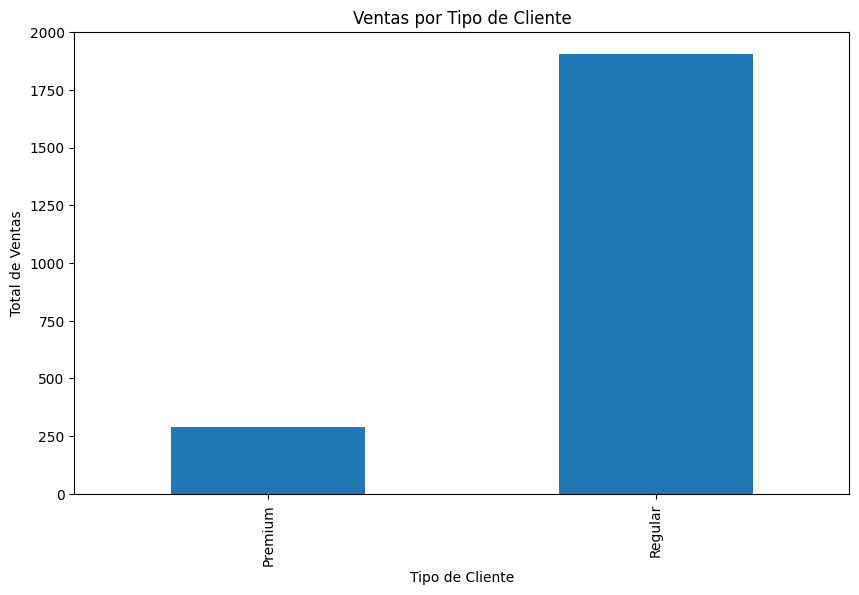


Proceso ETL completado. Se han generado nuevos archivos CSV con los resultados.


In [37]:
# Visualización de datos
plt.figure(figsize=(10,6))
ventas_por_tipo.plot(kind='bar')
plt.title('Ventas por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Total de Ventas')
plt.show()

print("\nProceso ETL completado. Se han generado nuevos archivos CSV con los resultados.")

In [47]:
ventas_por_dia

,Fecha,Total
0,2024-01-05,924.98
4,2024-01-15,629.97
2,2024-01-10,349.97
1,2024-01-07,209.97
3,2024-01-12,79.99


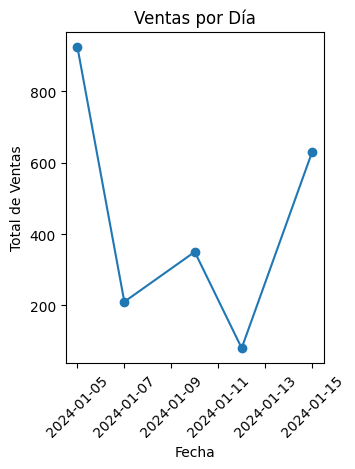

In [51]:
plt.subplot(1, 2, 2)
plt.plot(ventas_por_dia['Fecha'],ventas_por_dia['Total'], marker='o')
plt.title('Ventas por Día')
plt.xlabel('Fecha')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()